## 1.Sıcaklık Tahmini
Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.
Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
tem_data = pd.read_csv("weatherHistory.csv")
tem_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
tem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [3]:
tem_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

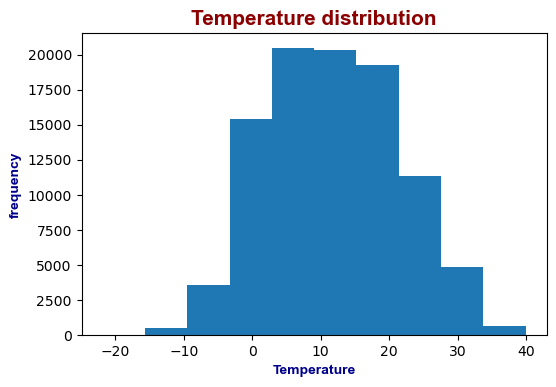

In [4]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(tem_data["Temperature (C)"])
plt.title("Temperature distribution", fontdict = baslik_font)
plt.xlabel("Temperature", fontdict=eksen_font)
plt.ylabel("frequency", fontdict=eksen_font)
plt.show()

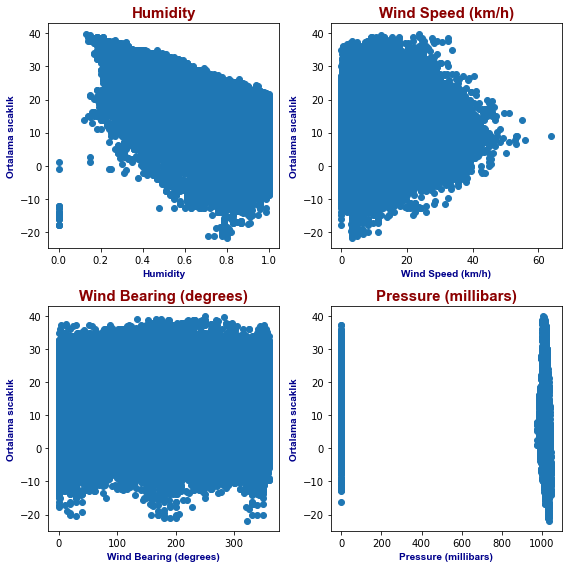

In [5]:
plt.figure(figsize=(8,8))
tem_features = ["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]

for i,col in enumerate(tem_features):
    plt.subplot(2,2,i+1)
    plt.scatter(col,'Temperature (C)', data = tem_data)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('Ortalama sıcaklık',fontdict=eksen_font)
plt.tight_layout()
plt.show()

In [6]:
Y = tem_data["Temperature (C)"]
X = tem_data[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]

X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:49:44   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Varsayım 1: Katsayılarda modelin doğrusallığı

In [7]:
lrm_ornek = linear_model.LinearRegression()
lrm_ornek.fit(X,Y)

Y_tahmin = lrm_ornek.predict(X)         # b0,b1..parametreleriyle tahmin ettiği sıcaklık

print('Değişkenler: \n', lrm_ornek.coef_)
print('Sabit değer (bias): \n', lrm_ornek.intercept_)

Değişkenler: 
 [ 0.00000000e+00 -3.24962454e+01 -2.01413742e-01  4.04836936e-03
 -6.91759209e-04]
Sabit değer (bias): 
 37.926438185285384


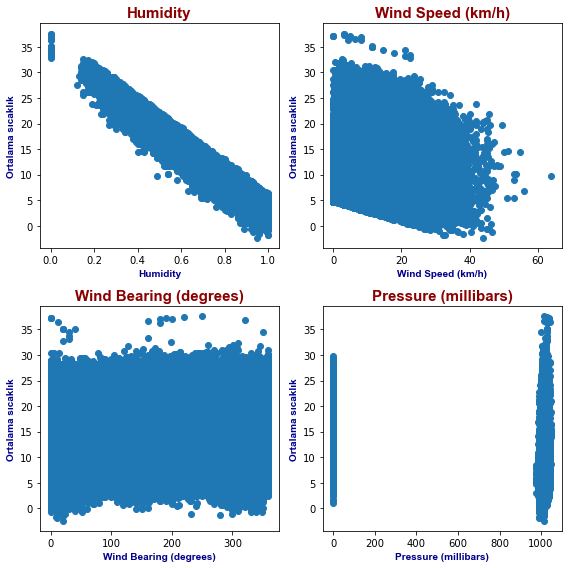

In [8]:
plt.figure(figsize=(8,8))
tem_features = ["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]

for i,col in enumerate(tem_features):                                             
    plt.subplot(2,2,i+1)
    plt.scatter(tem_data[col],Y_tahmin)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('Ortalama sıcaklık',fontdict=eksen_font)
plt.tight_layout()
plt.show()

### Varsayım 2: Hata terimi ortalamada sıfır olmalıdır

In [74]:
hatalar = Y - Y_tahmin

print("sıcaklık derecesi modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

sıcaklık derecesi modelinin ortalama hatası : 0.000000000000005


### Varsayım 3: homoscedasticity

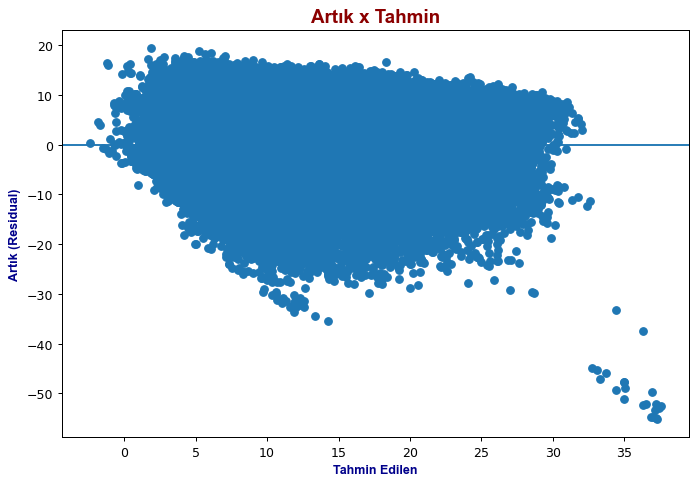

In [10]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(Y_tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

 Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

In [11]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(Y_tahmin, hatalar)
lev_stats = levene(Y_tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


### Varsayım 4: düşük çoklu doğrusallık/low multicollinearity

In [14]:
corr=tem_data[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]].corr()
corr

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Humidity,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),0.005454,-0.049263,-0.011651,1.000000


0.70 ten büyük değerler yer almamaktadır,bu yüzden birbiriyle yüksek korelasyona sahip olan değişkenler yoktur diyebiliriz.En yüksek korelasyon wind speed ile humidity değişkenleri arasındadır.

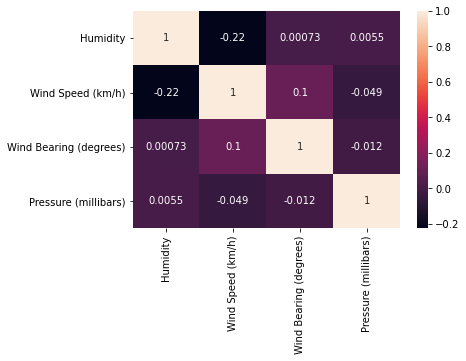

In [15]:
sns.heatmap(corr,annot=True)

### Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır


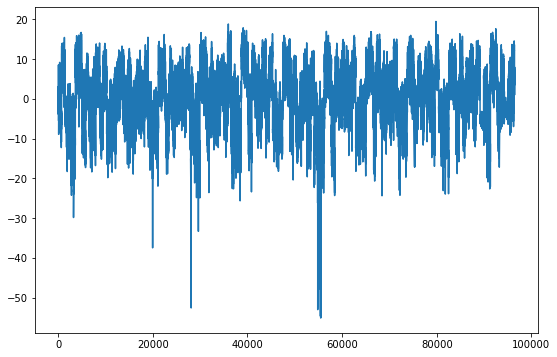

In [16]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

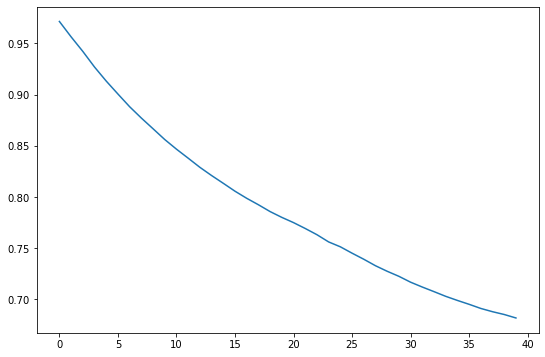

In [17]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

OLS Regression Results tablosunda da görüldüğü gibi hata korelasyon değeri 0.057 dir.
1.5 ile 2.5 arasındaki test istatistiği değerleri normal kabul edilir. Bununla birlikte, bu aralığın dışındaki değerlerde hata terimleri arasında otokorelasyon vardır.

In [19]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(hatalar)

0.05734620892929584

### Varsayım 6: özellikler hatalarla korele olmamalıdır


In [102]:
hatalar=list(hatalar)
hatalar_df = pd.DataFrame({"hatalar":hatalar})
X = tem_data[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
tem_data1 = pd.concat([X,hatalar_df],axis = 1)
tem_data1.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),hatalar
0,0.89,14.1197,251.0,1015.13,2.997429
1,0.86,14.2646,259.0,1015.63,1.903019
2,0.89,3.9284,204.0,1015.94,1.041150
3,0.83,14.1036,269.0,1016.41,-0.210907
4,0.83,11.0446,259.0,1016.51,-0.319812


özellikler ile hatalar arasında korelasyon yoktur.

In [103]:
tem_data1.corr().hatalar

Humidity                  6.183601e-15
Wind Speed (km/h)        -7.131807e-15
Wind Bearing (degrees)   -1.075775e-14
Pressure (millibars)     -2.609555e-15
hatalar                   1.000000e+00
Name: hatalar, dtype: float64

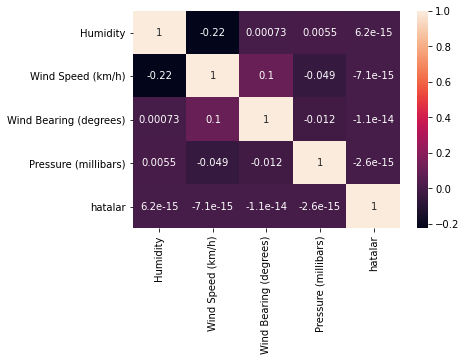

In [104]:
sns.heatmap(tem_data1.corr(),annot=True)

### Hataların Normalliği

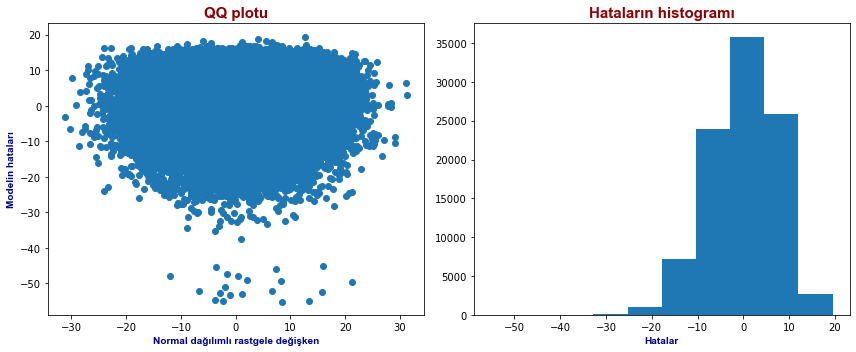

In [72]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

Yukarıdaki grafiklerde görüldüğü gibi, hatalarımız normal olarak dağıtılmamaktadır. Eğer öyle olsalardı, QQ arsasının sol altından sağ üst köşesine doğru doğru bir çizgi olması gerekirdi.

Her iki testin p-değerleri de hatalarımızın normal olarak dağılmadığını gösterir

In [57]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 38317.501723366186 ve p değeri : 0.0
Normal test değeri      : 407.88446281438934  ve p değeri : 0.000000000000000000000000000000


## 2. Ev fiyatları
Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter notebooku gönderin:

Ev Fiyatları verilerini Kaggle'dan indirin.
Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.
Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.

In [20]:
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


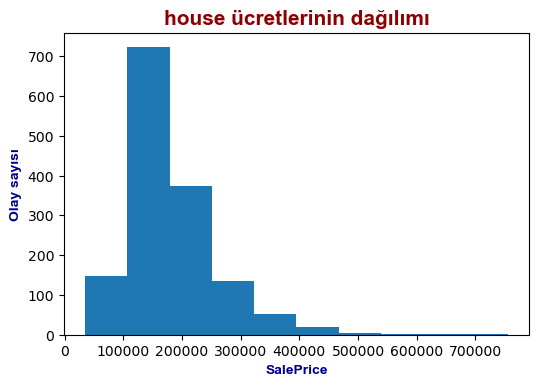

In [21]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(house.SalePrice)
plt.title("house ücretlerinin dağılımı", fontdict = baslik_font)
plt.xlabel("SalePrice", fontdict=eksen_font)
plt.ylabel("Olay sayısı", fontdict=eksen_font)
plt.show()

In [22]:
KitchenQual_type = {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}
house["KitchenQual_type"] = house["KitchenQual"].map(KitchenQual_type)

In [23]:
price_corr = house.corr().SalePrice.abs().sort_values(ascending=False).index[0:11]
house[price_corr].corr().SalePrice

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
KitchenQual_type    0.659600
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
Name: SalePrice, dtype: float64

In [24]:
house1 = house[["Neighborhood","Exterior1st","KitchenQual_type","OverallQual","GrLivArea",
                "GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","SalePrice"]]

house1 = pd.concat([house1,pd.get_dummies(house1[["Neighborhood","Exterior1st"]])],axis=1).drop(
    columns=["Neighborhood","Exterior1st"],axis=1)

In [25]:
y = house1['SalePrice']
x = house1.drop("SalePrice",axis=1)

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
feature_select = SequentialFeatureSelector(LinearRegression(),
                                          k_features = 20,
                                          floating = True,
                                          forward = True,
                                          scoring = "r2",
                                          cv = 0)
feature_select.fit(x,y)
list(feature_select.k_feature_names_)

['KitchenQual_type',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'YearBuilt',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd']

In [26]:
house_x = house1[list(feature_select.k_feature_names_)]
house_y = house1["SalePrice"]

import statsmodels.api as sm
house_x = sm.add_constant(house_x)
results = sm.OLS(house_y,house_x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     322.4
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:11:05   Log-Likelihood:                -17302.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1439   BIC:                         3.476e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.468e+05   9.76e+04     -5.603      0.000   -7.38e+05   -3.55e+05
KitchenQual_type      1.531e+04   1947.834      7.858      0.000    1.15e+04    1.91e+04
OverallQual           1.348e+04   1158.281     11.636      0.000    1.12e+04    1.57e+04
GrLivArea               45.3071      2.393     18.933      0.000      40.613      50.001
GarageCars            1.182e+04   1663.497      7.107      0.000    8559.346    1.51e+04
TotalBsmtSF             21.3969      2.593      8.250      0.000      16.309      26.484
YearBuilt              247.3338     51.009      4.849      0.000     147.275     347.393
Neighborhood_Blmngtn -1.866e+04   8501.762     -2.195      0.028   -3.53e+04   -1987.679
Neighborhood_BrDale  -2.418e+04   8751.574     -2.763      0.006   -4.14e+04   -7016.595
Neighborhood_BrkSide  1.023e+04   4965.652      2.061      0.040     491.715       2e+04
Neighborhood_ClearCr  2.524e+04   6623.432      3.811      0.000    1.23e+04    3.82e+04
Neighborhood_Crawfor  2.908e+04   5240.895      5.548      0.000    1.88e+04    3.94e+04
Neighborhood_MeadowV -2.511e+04   1.02e+04     -2.463      0.014   -4.51e+04   -5108.097
Neighborhood_NoRidge  5.795e+04   5888.011      9.843      0.000    4.64e+04    6.95e+04
Neighborhood_NridgHt  4.793e+04   4569.711     10.490      0.000     3.9e+04    5.69e+04
Neighborhood_OldTown -9705.9141   4107.066     -2.363      0.018   -1.78e+04   -1649.437
Neighborhood_StoneBr  5.086e+04   7253.367      7.012      0.000    3.66e+04    6.51e+04
Neighborhood_Timber   1.918e+04   5778.604      3.319      0.001    7841.098    3.05e+04
Neighborhood_Veenker  3.485e+04   1.05e+04      3.328      0.001    1.43e+04    5.54e+04
Exterior1st_BrkFace   1.425e+04   5036.499      2.829      0.005    4366.346    2.41e+04
Exterior1st_CemntBd   1.666e+04   5526.725      3.015      0.003    5819.427    2.75e+04
==============================================================================
Omnibus:                      407.884   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38317.502
Skew:                          -0.058   Prob(JB):                         0.00
Kurtosis:                      28.097   Cond. No.                     2.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

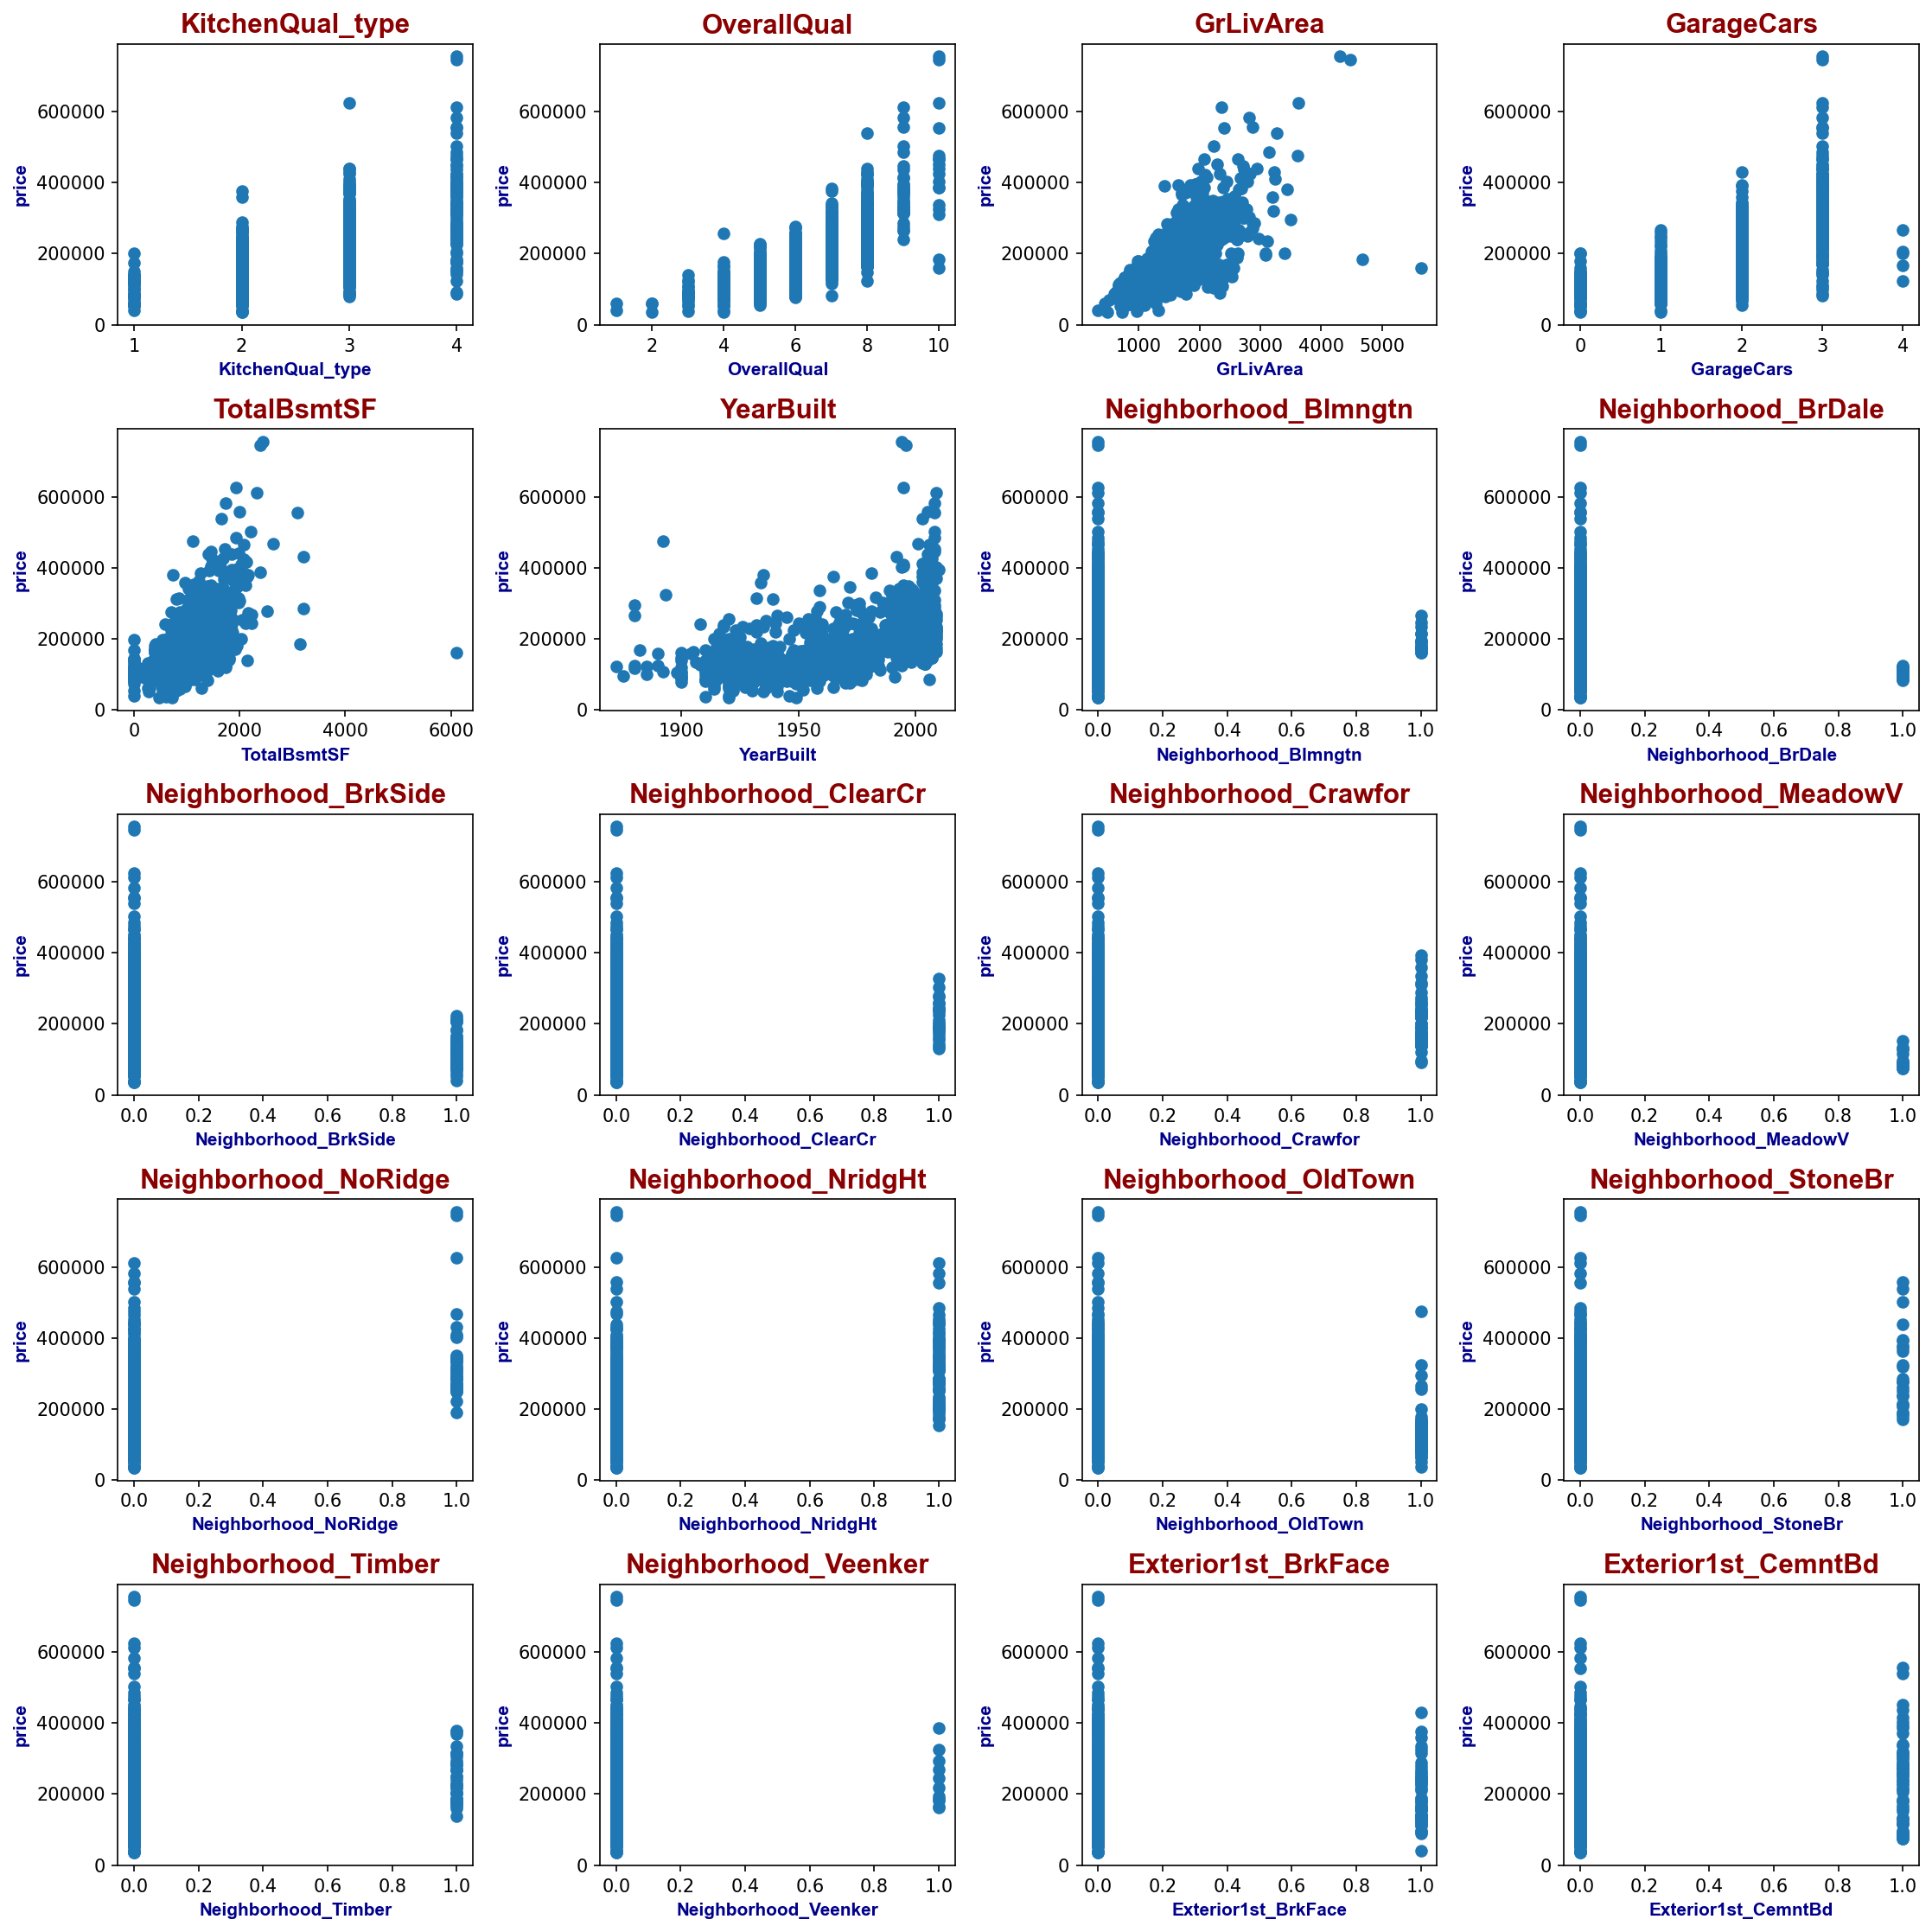

In [27]:
plt.figure(figsize=(15,15),dpi=150)
housex_features = ['KitchenQual_type','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','Neighborhood_Blmngtn',
 'Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_Crawfor','Neighborhood_MeadowV',
 'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker',
 'Exterior1st_BrkFace','Exterior1st_CemntBd']

for i,col in enumerate(housex_features):
    plt.subplot(5,4,i+1)
    plt.scatter(col,'SalePrice', data = house1)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('price',fontdict=eksen_font)
plt.tight_layout()
plt.show()

#### Varsayım 1: Katsayılarda modelin doğrusallığı

In [39]:
lrm_house = linear_model.LinearRegression()
lrm_house.fit(house_x,house_y)

house_tahmin = lrm_house.predict(house_x)

print('Değişkenler: \n', lrm_house.coef_)
print('Sabit değer (bias): \n', lrm_house.intercept_)

Değişkenler: 
 [ 0.00000000e+00  1.53062681e+04  1.34774961e+04  4.53070536e+01
  1.18224842e+04  2.13968854e+01  2.47333772e+02 -1.86648530e+04
 -2.41838046e+04  1.02324065e+04  2.52433609e+04  2.90763909e+04
 -2.51083446e+04  5.79548870e+04  4.79342258e+04 -9.70591409e+03
  5.08583791e+04  1.91764888e+04  3.48504939e+04  1.42460132e+04
  1.66607271e+04]
Sabit değer (bias): 
 -546818.4048398396


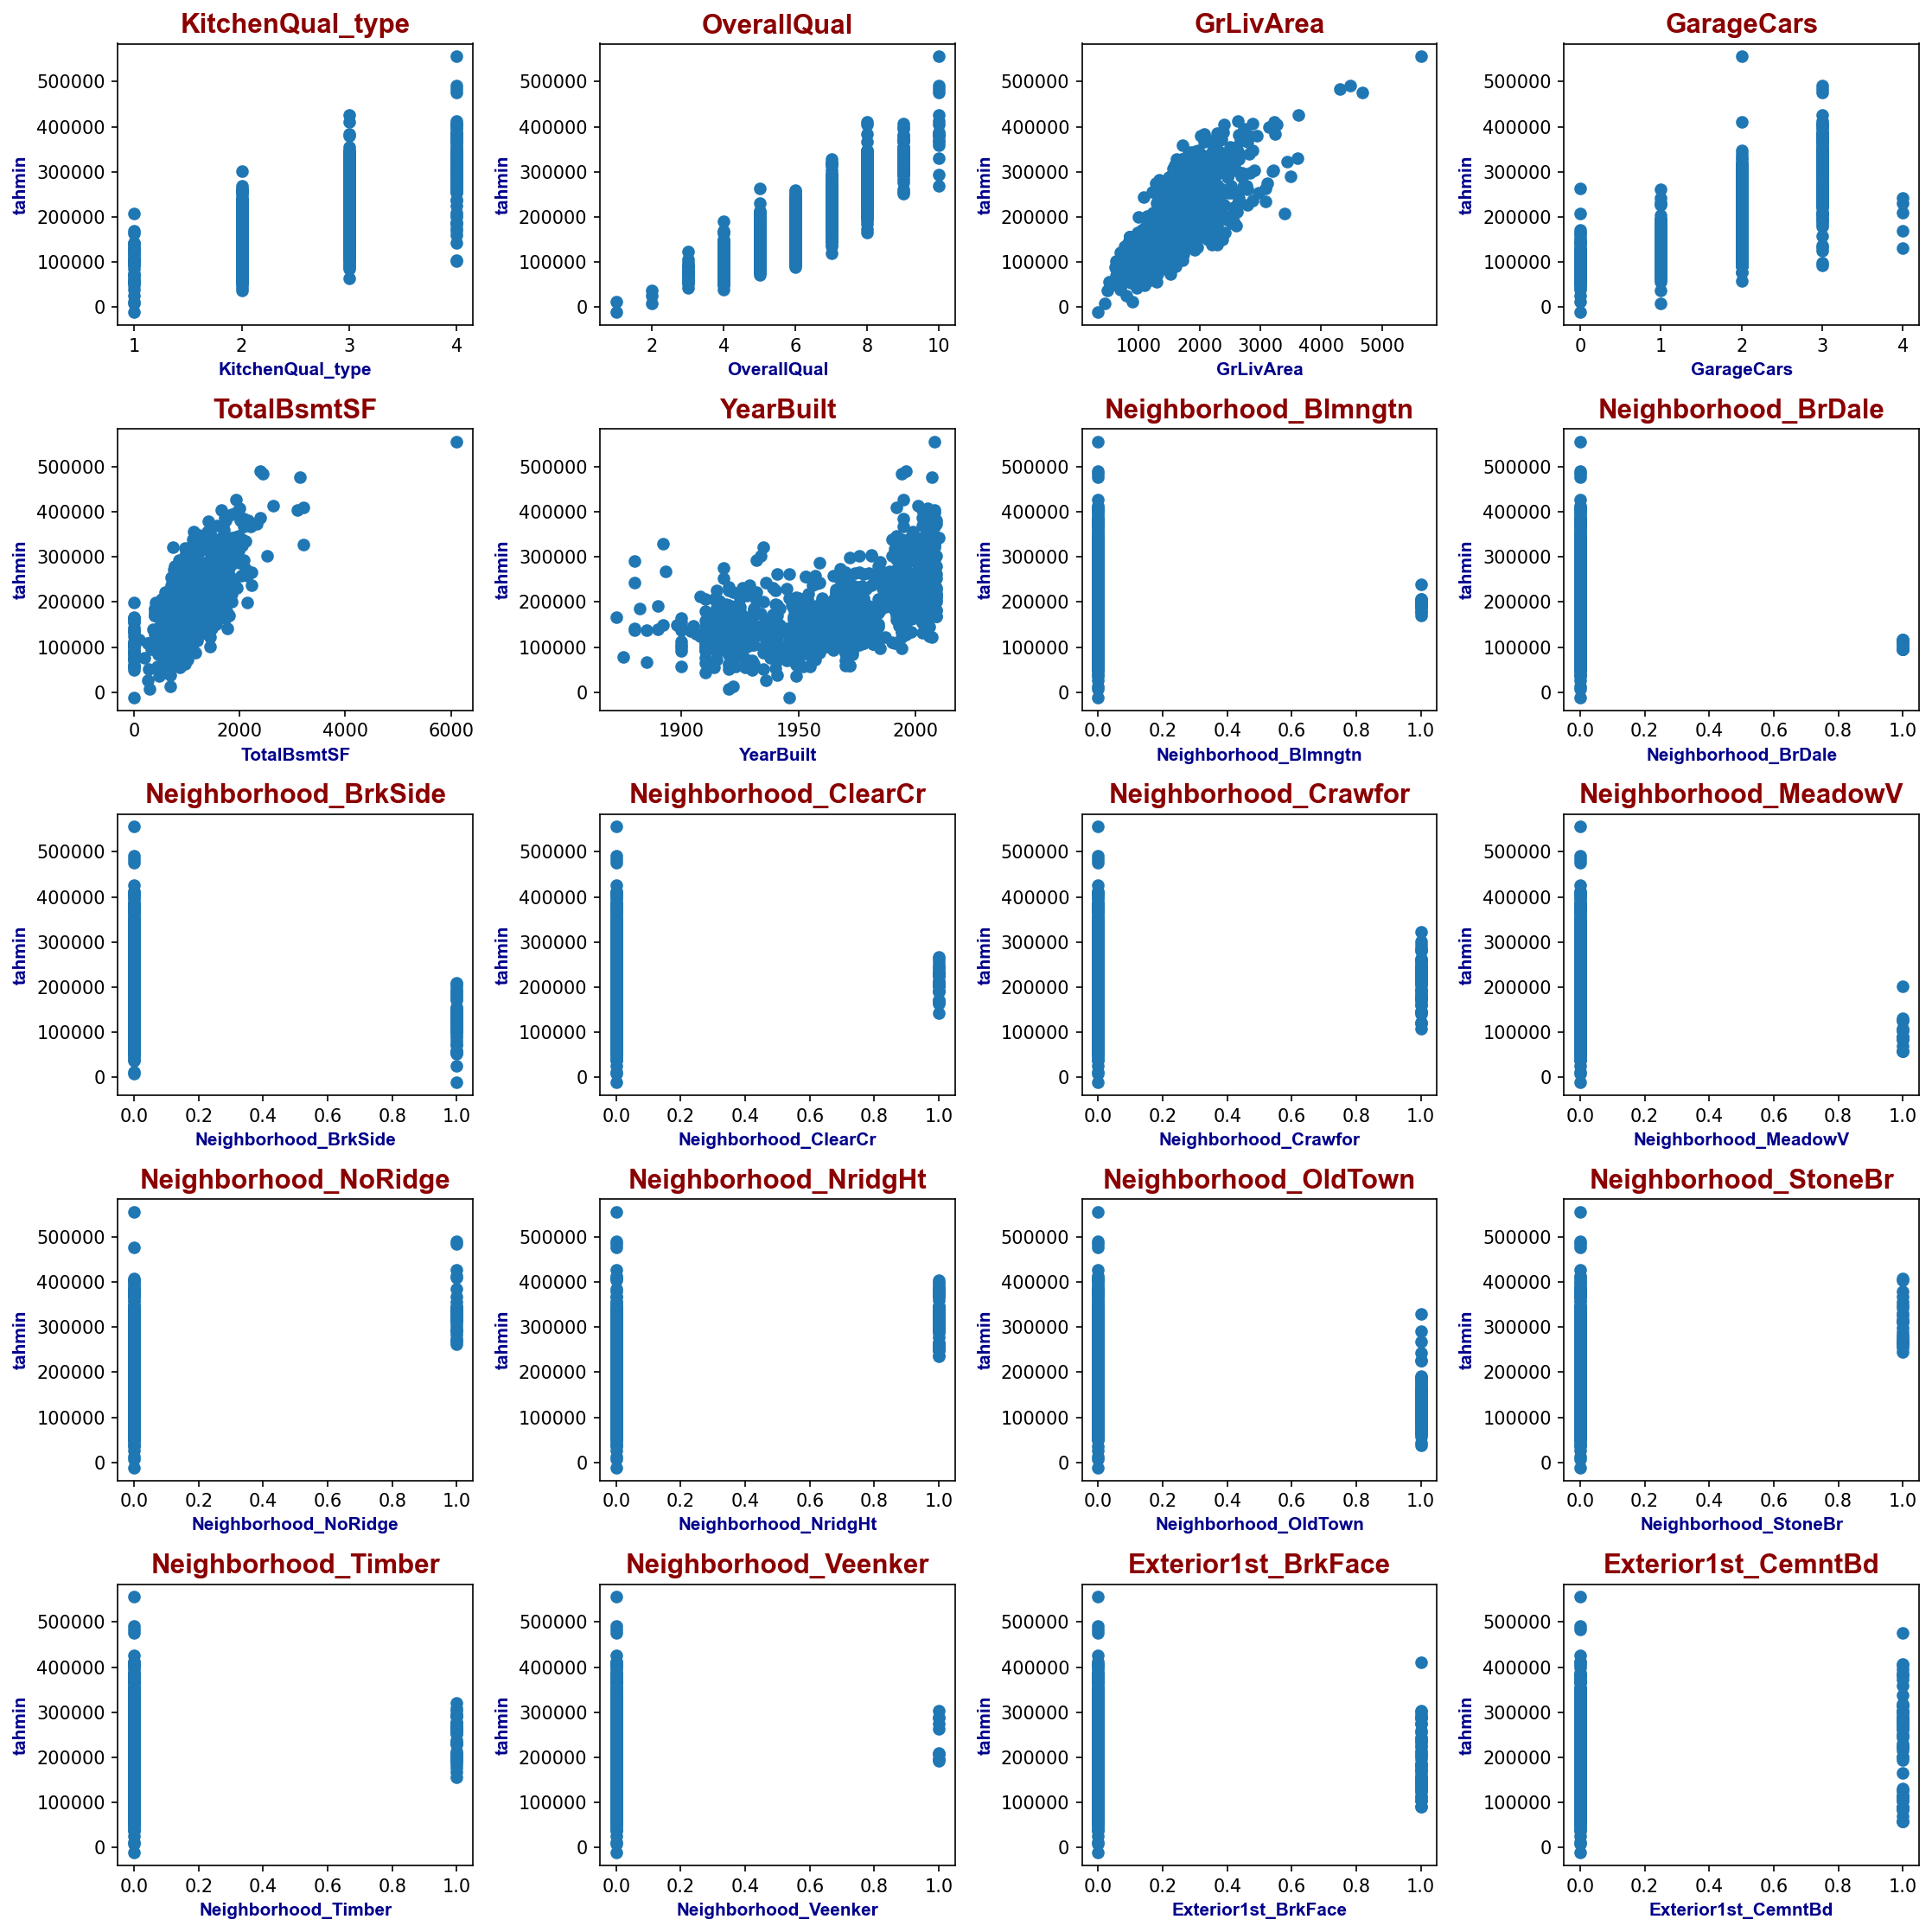

In [40]:
plt.figure(figsize=(15,15),dpi=150)
housex_features = ['KitchenQual_type','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','Neighborhood_Blmngtn',
 'Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_Crawfor','Neighborhood_MeadowV',
 'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker',
 'Exterior1st_BrkFace','Exterior1st_CemntBd']

for i,col in enumerate(housex_features):
    plt.subplot(5,4,i+1)
    plt.scatter(house1[col],house_tahmin)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('tahmin',fontdict=eksen_font)
plt.tight_layout()
plt.show()

### Varsayım 2: Hata terimi ortalamada sıfır olmalıdır

In [48]:
house_hatalar = house_y - house_tahmin

print("sıcaklık derecesi modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

sıcaklık derecesi modelinin ortalama hatası : 0.000000000050314


### Varsayım 3: homoscedasticity

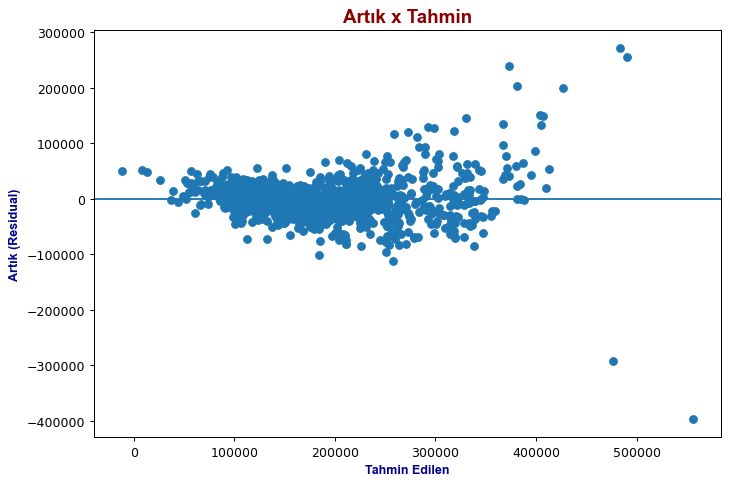

In [49]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(house_tahmin, house_hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

In [51]:
bart_stats = bartlett(house_tahmin, house_hatalar)
lev_stats = levene(house_tahmin, house_hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 753.064 ve p değeri : 0.000000000000000000000
Levene test değeri   : 610.151 ve p değeri : 0.000000000000000000000


### Varsayım 4: düşük çoklu doğrusallık/low multicollinearity

In [44]:
corr=house1[['KitchenQual_type','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','Neighborhood_Blmngtn',
 'Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_Crawfor','Neighborhood_MeadowV',
 'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker',
 'Exterior1st_BrkFace','Exterior1st_CemntBd']].corr()


In [45]:
corr

,KitchenQual_type,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_BrkFace,Exterior1st_CemntBd
KitchenQual_type,1.000000,0.673331,0.420563,0.509810,0.432630,0.530165,0.089507,-0.071252,-0.162121,0.012599,-0.011772,-0.054827,0.137602,0.353777,-0.111313,0.168756,0.087898,0.040252,-0.026009,0.153685
OverallQual,0.673331,1.000000,0.593007,0.600671,0.537808,0.572323,0.084566,-0.031355,-0.154120,-0.020882,0.024109,-0.127870,0.224693,0.368724,-0.148731,0.196736,0.125168,0.039575,-0.024424,0.113753
GrLivArea,0.420563,0.593007,1.000000,0.467247,0.454868,0.199010,-0.018084,-0.074599,-0.120958,0.072576,0.100013,-0.094329,0.321450,0.179892,-0.019705,0.091365,0.072790,0.004009,0.038679,0.077578
GarageCars,0.509810,0.600671,0.467247,1.000000,0.434585,0.537850,0.085114,-0.090477,-0.161916,-0.003205,-0.035570,-0.128548,0.197277,0.282752,-0.129297,0.111817,0.131576,0.037763,-0.027003,0.037599
TotalBsmtSF,0.432630,0.537808,0.454868,0.434585,1.000000,0.391452,0.066077,-0.113664,-0.135432,0.053862,-0.010640,-0.100007,0.169117,0.293445,-0.163260,0.140122,0.110743,0.052418,0.053755,0.093922
YearBuilt,0.530165,0.572323,0.199010,0.537850,0.391452,1.000000,0.122111,0.000592,-0.268364,-0.021751,-0.187267,0.004747,0.136082,0.268898,-0.464138,0.118962,0.116810,0.032020,-0.097471,0.104042
Neighborhood_Blmngtn,0.089507,0.084566,-0.018084,0.085114,0.066077,0.122111,1.000000,-0.011425,-0.022077,-0.015177,-0.020650,-0.011781,-0.018450,-0.025611,-0.031437,-0.014326,-0.017743,-0.009457,-0.020439,-0.022665
Neighborhood_BrDale,-0.071252,-0.031355,-0.074599,-0.090477,-0.113664,0.000592,-0.011425,1.000000,-0.021410,-0.014719,-0.020027,-0.011425,-0.017893,-0.024838,-0.030488,-0.013894,-0.017208,-0.009171,-0.019822,0.043780
Neighborhood_BrkSide,-0.162121,-0.154120,-0.120958,-0.161916,-0.135432,-0.268364,-0.022077,-0.021410,1.000000,-0.028441,-0.038696,-0.022077,-0.034573,-0.047993,-0.058911,-0.026846,-0.033249,-0.017722,-0.019019,-0.024945
Neighborhood_ClearCr,0.012599,-0.020882,0.072576,-0.003205,0.053862,-0.021751,-0.015177,-0.014719,-0.028441,1.000000,-0.026603,-0.015177,-0.023769,-0.032995,-0.040501,-0.018457,-0.022859,-0.012183,0.028589,-0.029199


### Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır

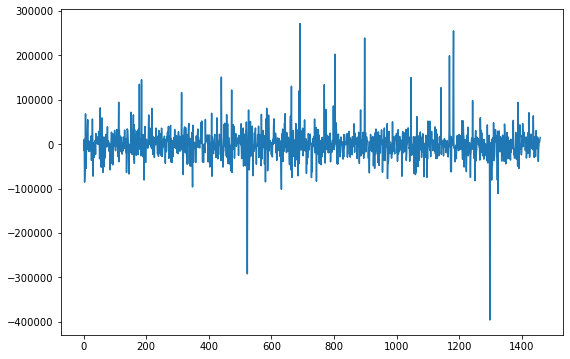

In [52]:
plt.figure(figsize=(9,6))
plt.plot(house_hatalar)
plt.show()

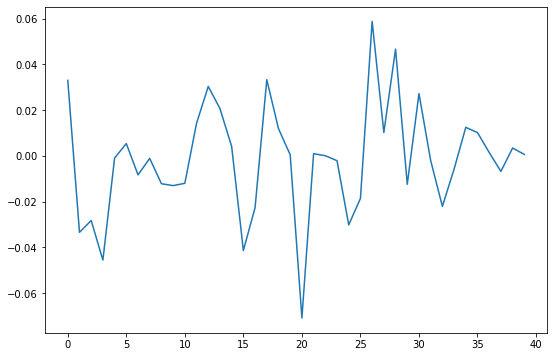

In [53]:
acf_data = acf(house_hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

hem grafiklerden hem de test istatistiklerinden görüldüğü gibi hata terimleri arasında otokorelasyon yoktur.

In [54]:
durbin_watson(house_hatalar)

1.9338207899875852

### Varsayım 6: özellikler hatalarla korele olmamalıdır

In [109]:

house_hatalar_df = pd.DataFrame({"hatalar":house_hatalar})

house_x1 = pd.concat([house_x,house_hatalar_df],axis = 1)
house_x1.head()

,const,KitchenQual_type,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_BrkFace,Exterior1st_CemntBd,hatalar
0,1.0,3,7,1710,2,856,2003,0,0,0,...,0,0,0,0,0,0,0,0,0,211.818804
1,1.0,2,6,1262,2,1262,1976,0,0,0,...,0,0,0,0,0,0,1,0,0,-14566.474511
2,1.0,3,7,1786,2,920,2001,0,0,0,...,0,0,0,0,0,0,0,0,0,10893.749609
3,1.0,3,7,1717,3,756,1915,0,0,0,...,0,0,0,0,0,0,0,0,0,-85599.145148
4,1.0,3,8,2198,3,1145,2000,0,0,0,...,0,1,0,0,0,0,0,0,0,-69094.589132


hatalar ile değişkenler arasında yüksek korelasyon yoktur.

In [110]:
house_x1.corr().hatalar

const                            NaN
KitchenQual_type       -4.842159e-14
OverallQual            -2.633092e-14
GrLivArea              -7.541164e-14
GarageCars             -2.276279e-14
TotalBsmtSF            -5.587704e-14
YearBuilt              -8.243112e-15
Neighborhood_Blmngtn    1.514352e-15
Neighborhood_BrDale     1.074679e-14
Neighborhood_BrkSide    9.940360e-15
Neighborhood_ClearCr   -1.054647e-14
Neighborhood_Crawfor   -6.496716e-15
Neighborhood_MeadowV    4.049838e-15
Neighborhood_NoRidge   -2.188106e-14
Neighborhood_NridgHt   -1.446141e-14
Neighborhood_OldTown   -1.554238e-16
Neighborhood_StoneBr   -6.267528e-15
Neighborhood_Timber    -3.845188e-15
Neighborhood_Veenker   -8.961973e-16
Exterior1st_BrkFace    -6.427114e-15
Exterior1st_CemntBd    -9.400397e-15
hatalar                 1.000000e+00
Name: hatalar, dtype: float64

### Hataların Normalliği

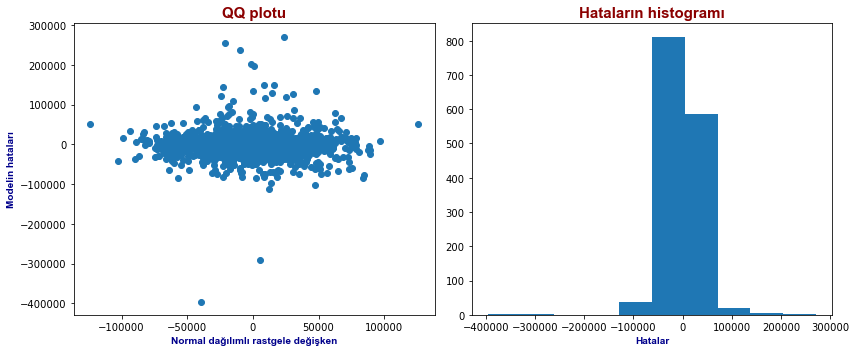

In [55]:

rand_nums = np.random.normal(np.mean(house_hatalar), np.std(house_hatalar), len(house_hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, house_hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(house_hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

Yukarıdaki grafiklerde görüldüğü gibi, hatalarımız normal olarak dağıtılmamaktadır. Eğer öyle olsalardı, QQ grafiğinde sol alttan sağ üst köşesine doğru doğru bir çizgi olması gerekirdi.Test istatistiğinde de p value < 0.05 ten küçük olduğu için normal dağılım yoktur.

In [58]:
jb_stats = jarque_bera(house_hatalar)
norm_stats = normaltest(house_hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 38317.501723366186 ve p değeri : 0.0
Normal test değeri      : 407.88446281438934  ve p değeri : 0.000000000000000000000000000000
